In [30]:
# imported packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

In [31]:

url="https://www.pmel.noaa.gov/co2/timeseries/GRAYSREEF.txt"

# religned column names from data site 
names=['date', 'time','SST','SSS','pCO2_sw','pCO2_air','xCO2_air','pH_sw','DOXY','CHL','NTU']

# created dataframe with correct column names 
df=pd.read_csv(url, skiprows=110, delimiter='\s', index_col=False, names=names, infer_datetime_format=True, parse_dates=[0])

display(df)
print(df.columns)

/tmp/ipykernel_63/1360010467.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv(url, skiprows=110, delimiter='\s', index_col=False, names=names, infer_datetime_format=True, parse_dates=[0])
/tmp/ipykernel_63/1360010467.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(url, skiprows=110, delimiter='\s', index_col=False, names=names, infer_datetime_format=True, parse_dates=[0])


,date,time,SST,SSS,pCO2_sw,pCO2_air,xCO2_air,pH_sw,DOXY,CHL,NTU
0,2006-07-18,00:45,29.128,36.698,389.7,367.5,381.3,NaN,NaN,NaN,NaN
1,2006-07-18,01:45,29.084,36.691,386.3,367.9,381.4,NaN,NaN,NaN,NaN
2,2006-07-18,02:45,29.047,36.683,387.9,368.8,382.1,NaN,NaN,NaN,NaN
3,2006-07-18,03:45,28.983,36.676,389.6,369.0,382.3,NaN,NaN,NaN,NaN
4,2006-07-18,04:45,28.920,36.668,392.0,368.4,381.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38631,2020-07-12,00:17,NaN,NaN,NaN,NaN,414.2,NaN,NaN,NaN,NaN
38632,2020-07-12,03:17,NaN,NaN,NaN,NaN,408.9,NaN,NaN,NaN,NaN
38633,2020-07-12,06:17,NaN,NaN,NaN,NaN,410.8,NaN,NaN,NaN,NaN
38634,2020-07-12,09:17,NaN,NaN,NaN,NaN,421.4,NaN,NaN,NaN,NaN


Index(['date', 'time', 'SST', 'SSS', 'pCO2_sw', 'pCO2_air', 'xCO2_air',
       'pH_sw', 'DOXY', 'CHL', 'NTU'],
      dtype='object')


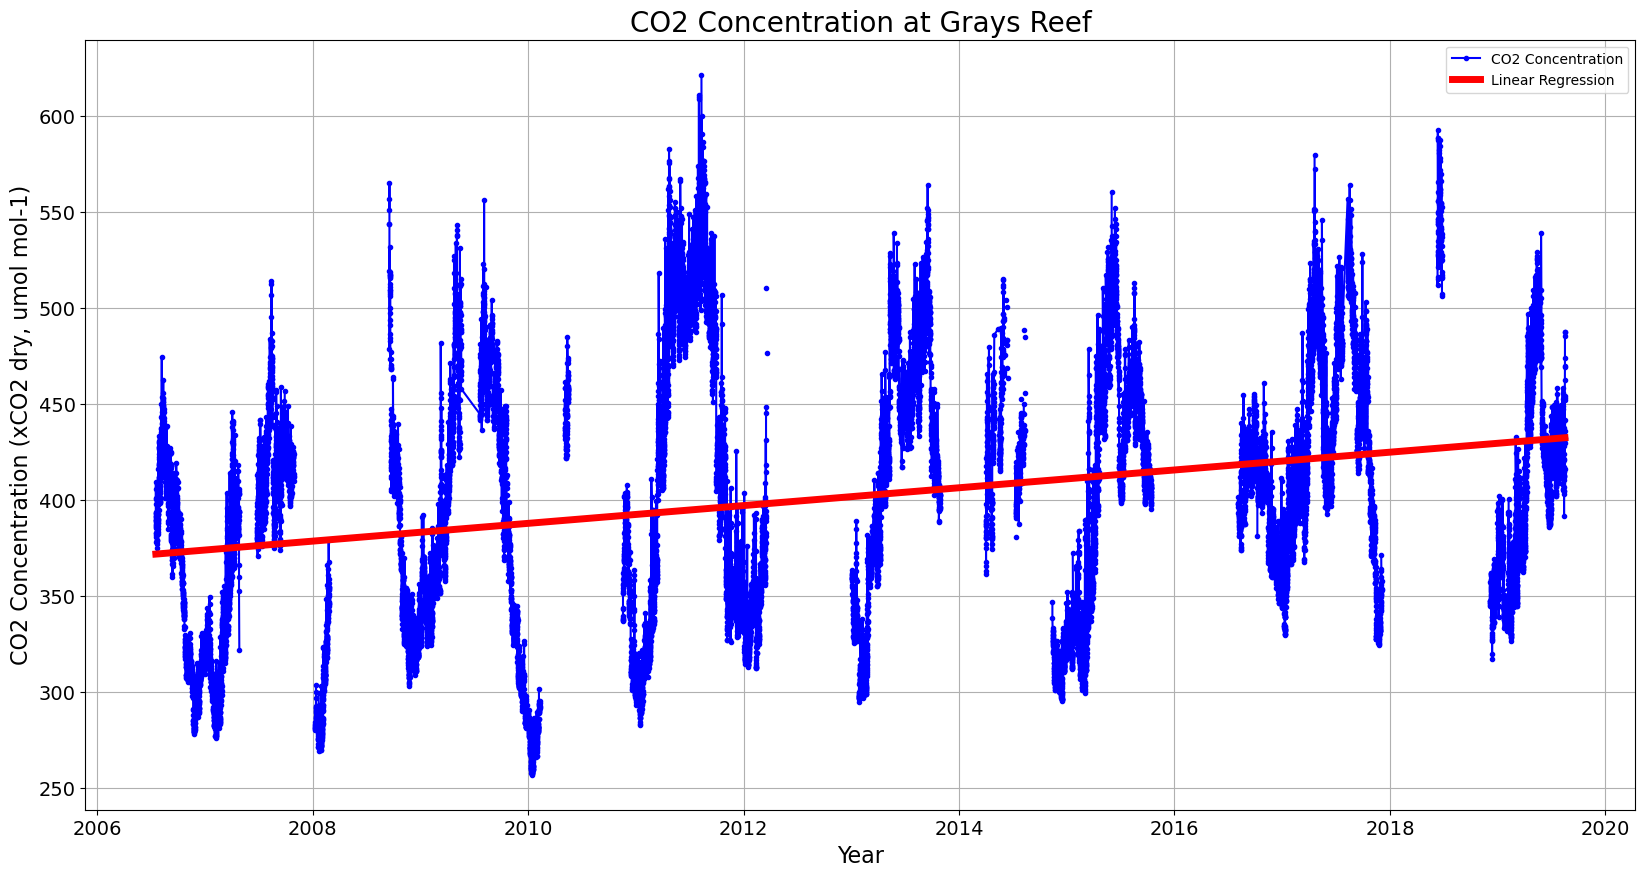

In [32]:
# defined variables from columns in data set 
date=df['date']
carbon=df['pCO2_sw']

# created figure
fig = plt.figure(figsize=(20,10))
plt.plot(date,carbon, c='blue', marker = '.', label = 'CO2 Concentration')

# included labels and details
plt.grid()
plt.title('CO2 Concentration at Grays Reef', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 Concentration (xCO2 dry, umol mol-1)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# converted datetime objects to numbers for linregress() to work
t = np.array(date)
t_as_numbers = mdates.date2num(t)

# removed the nan values from the dataset for all of the variables for linregress to work 
carbon_nan = np.isnan(carbon)
t_as_numbers = t_as_numbers[~carbon_nan]
carbon_nonan = carbon[~carbon_nan]
times_nonan = date[~carbon_nan]

# created variables for linear regression line 
slope, intercept, rvalue, pvalue, stderr = stats.linregress(t_as_numbers,carbon_nonan)
x_values = times_nonan
y_values = slope*t_as_numbers+intercept

# created linear regression line
plt.plot(x_values, y_values, color='red', label = 'Linear Regression', lw = 5)

# created legend for data and regression line
plt.legend()

#print('The slope is',slope)

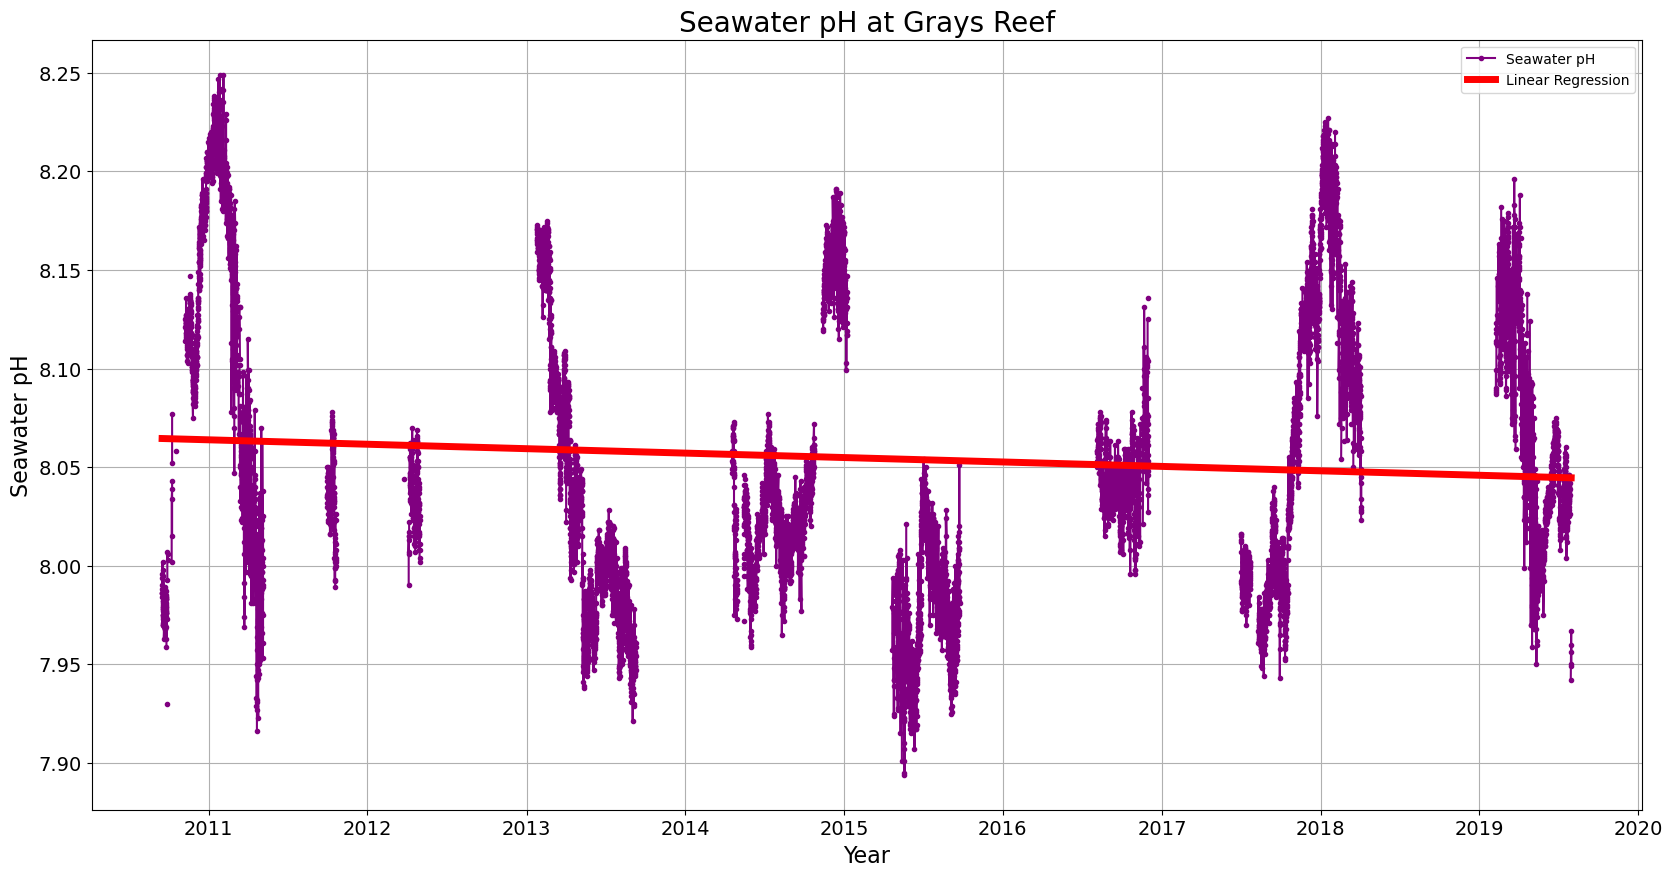

In [33]:
# defined variables from columns in data set 
date=df['date']
pH=df['pH_sw']

# created figure
fig = plt.figure(figsize=(20,10))
plt.plot(date,pH, c='purple', marker = '.', label = 'Seawater pH')

# included labels and details
plt.grid()
plt.title('Seawater pH at Grays Reef', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Seawater pH', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# converted datetime objects to numbers for linregress() to work
t = np.array(date)
t_as_numbers = mdates.date2num(t)

# removed the nan values from the dataset for all of the variables for linregress to work 
pH_nan = np.isnan(pH)
t_as_numbers = t_as_numbers[~pH_nan]
pH_nonan = pH[~pH_nan]
times_nonan = date[~pH_nan]

# created variables for linear regression line 
slope, intercept, rvalue, pvalue, stderr = stats.linregress(t_as_numbers,pH_nonan)
x_values = times_nonan
y_values = slope*t_as_numbers+intercept

# created linear regression line
plt.plot(x_values, y_values, color='red', label = 'Linear Regression', lw = 5)

# created legend for data and regression line
plt.legend()

#print('The slope is',slope)

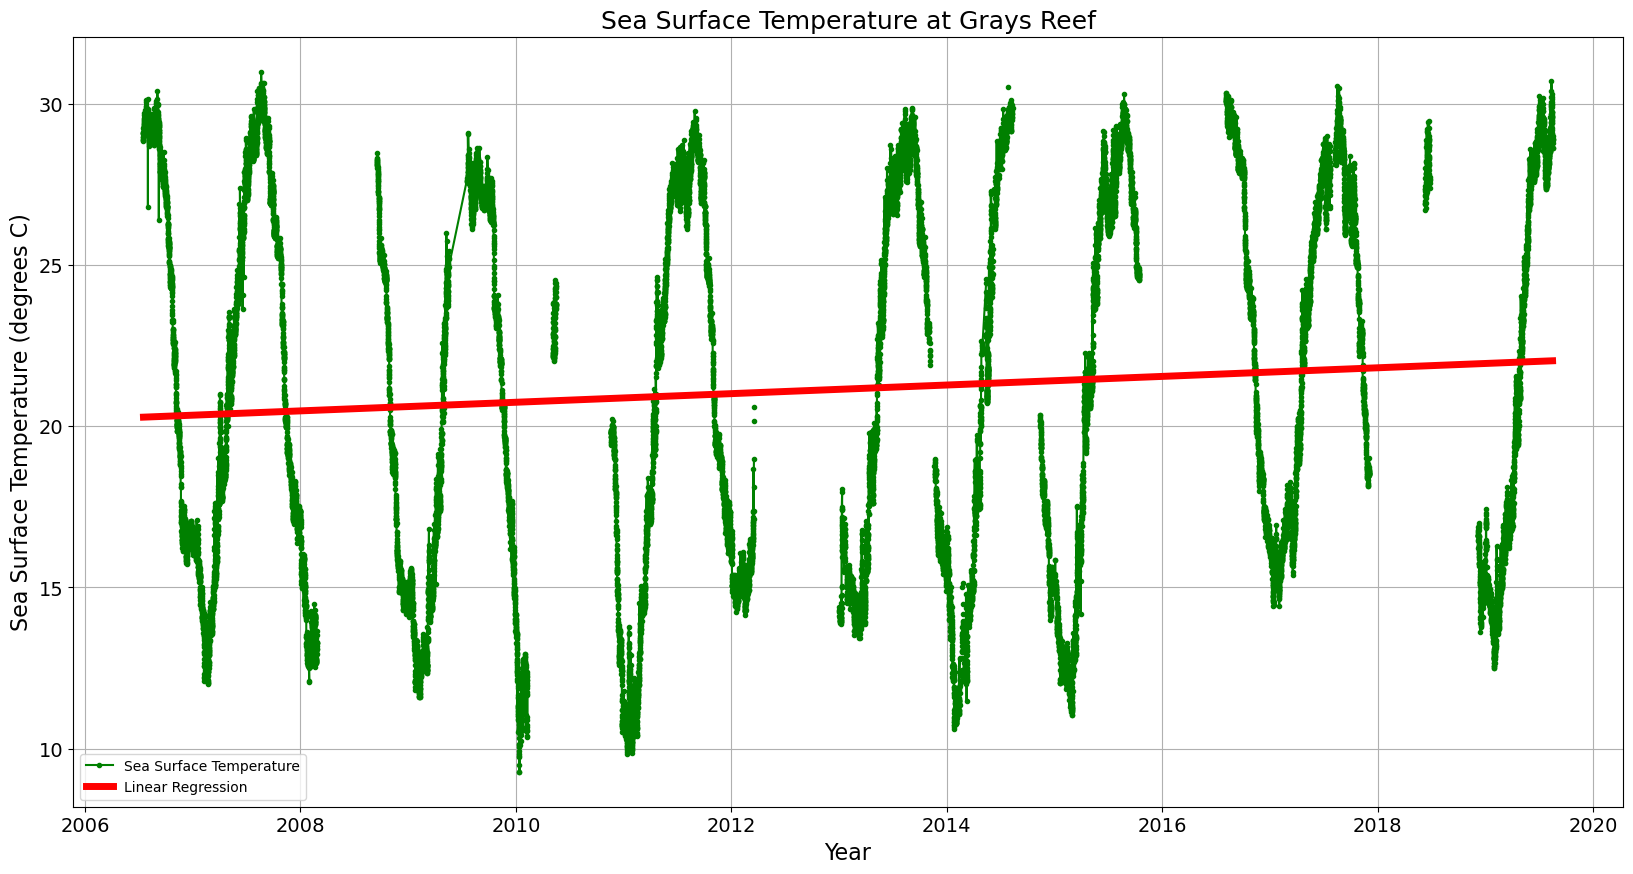

In [40]:
# defined variables from columns in data set 
date=df['date']
SST=df['SST']

# created figure
fig = plt.figure(figsize=(20,10))
plt.plot(date,SST, c='green', marker = '.', label = 'Sea Surface Temperature')

# included labels and details
plt.grid()
plt.title('Sea Surface Temperature at Grays Reef', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Sea Surface Temperature (degrees C)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# converted datetime objects to numbers for linregress() to work
t = np.array(date)
t_as_numbers = mdates.date2num(t)

# removed the nan values from the dataset for all of the variables for linregress to work 
SST_nan = np.isnan(SST)
t_as_numbers = t_as_numbers[~SST_nan]
SST_nonan = SST[~SST_nan]
times_nonan = date[~SST_nan]

# created variables for linear regression line 
slope, intercept, rvalue, pvalue, stderr = stats.linregress(t_as_numbers,SST_nonan)
x_values = times_nonan
y_values = slope*t_as_numbers+intercept

# created linear regression line
plt.plot(x_values, y_values, color='red', label = 'Linear Regression', lw = 5)

# created legend for data and regression line
plt.legend()

#print('The slope is',slope)

Text(0, 0.5, 'Chlorophyll')

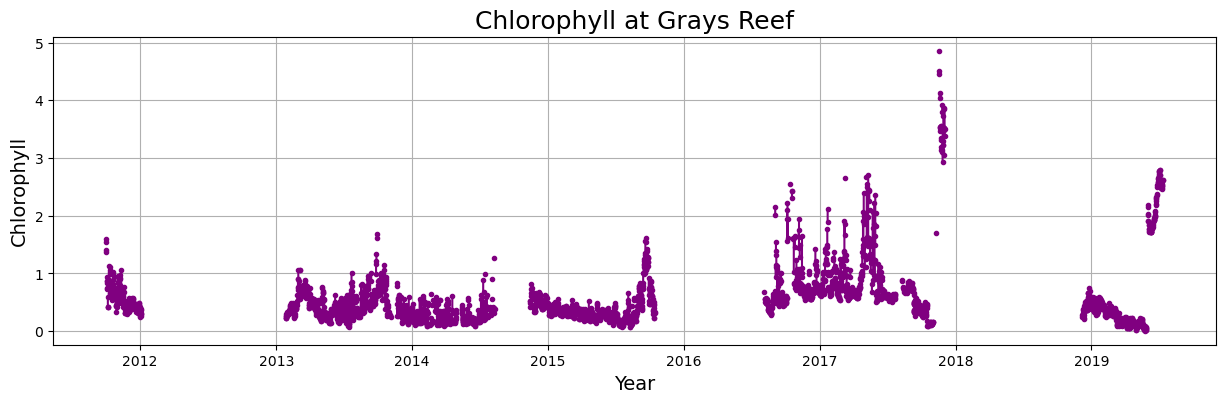

In [18]:
date=df['date']
chl=df['CHL']


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
plt.plot(date,chl, c='purple', marker = '.')

plt.grid()
plt.title('Chlorophyll at Grays Reef', fontsize=18)

#plt.ylim(datetime(2014, 6, 1), datetime(2020, 3, 1))

plt.xlabel('Year', fontsize=14)
plt.ylabel('Chlorophyll', fontsize=14)